In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%config IPCompleter.use_jedi=False

#  ROC curve computation

In this notebook, simulated data are used to show the effect on ROC curve of machine learning model performance. 
Data simulate ML models with different prediction capabilities. The models are then assigning more or less appropriate score to the samples, according to an higher or lower prediction capability. 

In [4]:
def division(numerator, denominator):
    """
    Return the result of the division between numerator and denominator.
    Return 0 when denominator is 0.
    """
    if denominator != 0:
        return numerator / denominator
    else:      
        return 0

In [5]:
# generate synthetic data
size = 200                                # sample size
target = np.random.randint(0,2,size)       # generate target label

In [6]:
ability = {}

delta_values = [0,0.2,0.4,0.5,0.75,1]

    
indexes_T = []
for i in range(len(target)):

    if target[i] == 1:
        indexes_T.append(i)


indexes_F = []
for i in range(len(target)):

    if target[i] == 0:
        indexes_F.append(i)

for delta in delta_values:        

    score = np.zeros(len(target))
    score[indexes_T] = np.random.uniform(delta,1,len(indexes_T))
    score[indexes_F] = np.random.uniform(0,1-delta,len(indexes_F))
#     score[indexes_T] = np.logspace(-1+delta,0,len(indexes_T))
#     score[indexes_F] = np.logspace(-1,0-delta,len(indexes_F))
#     a = np.logspace(-1+delta,0,len(indexes_T))
#     b = np.logspace(-1,0-delta,len(indexes_F))
#     np.random.shuffle(a)
#     np.random.shuffle(b)
#     score[indexes_T] = a
#     score[indexes_F] = b
    
    ability[delta] = {'score':score , 'iT':indexes_T, 'iF':indexes_F}
    
######################################à    
    
    
df_dict = {}

for delta in delta_values:
    

    df_dict[delta] = pd.DataFrame([target,ability[delta]['score']], index=['target','score']).T
    df_dict[delta]['target']  = df_dict[delta]['target'].apply(int)

In [7]:
df_dict[delta_values[0]].head()

,target,score
0,0,0.871888
1,0,0.474393
2,0,0.137616
3,1,0.862081
4,1,0.274023


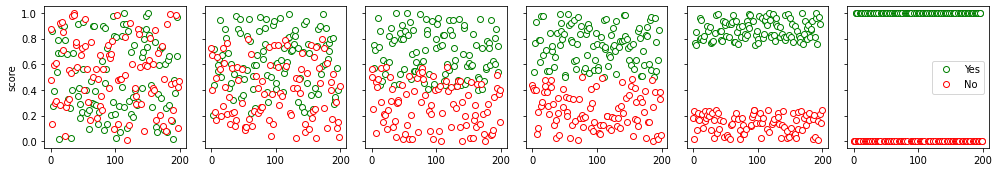

In [8]:
x = np.array(range(size))

plots_number = len(delta_values)
fig, ax = plt.subplots(1,plots_number,figsize=(14,2.5),sharey=True)
ax[0].set_ylabel('score')

for graph, delta in enumerate(delta_values):
    
    ax[graph].plot(x[ability[delta]['iT']], df_dict[delta]['score'][ability[delta]['iT']], 'og',mfc='w')
    ax[graph].plot(x[ability[delta]['iF']], df_dict[delta]['score'][ability[delta]['iF']], 'or',mfc='w')
    

plt.legend(['Yes', 'No'])
plt.tight_layout()

In [9]:
points_number = 30
thresholds = sorted(np.linspace(0,1,points_number), reverse=True)
rates = {}

for delta in delta_values:

    rate_TP = []
    rate_FP = []
    
    df = df_dict[delta]
    
    for t in thresholds:    
        prediction = np.where(df['score'] >= t, 1, 0)

        cumulative_TP = 0
        cumulative_FP = 0
        cumulative_TN = 0
        cumulative_FN = 0

        for index in df.index:
           

            if (prediction[int(index)] == 1) & (df.loc[index].target == 1):
                cumulative_TP += 1

            elif (prediction[int(index)] == 1) & (df.loc[index].target == 0):
                cumulative_FP += 1

            elif (prediction[int(index)] == 0) & (df.loc[index].target == 1):
                cumulative_FN +=1

            elif (prediction[int(index)] == 0) & (df.loc[index].target == 0):
                cumulative_TN +=1

            tpr = division(cumulative_TP, (cumulative_TP + cumulative_FN) )
            fpr = division(cumulative_FP, (cumulative_FP + cumulative_TN) )

        rate_TP.append(tpr)
        rate_FP.append(fpr) 
        
        rates[delta] = {'tpr':rate_TP, 
                        'fpr':rate_FP
                       }

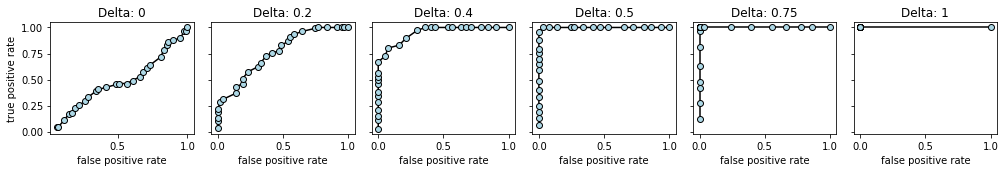

In [10]:
plots_number = len(delta_values)
fig, ax = plt.subplots(1, plots_number, figsize=(14,2.5),sharey=True)

ax[0].set_ylabel('true positive rate')
for graph, delta in enumerate(delta_values):
    
    rate_TP = rates[delta_values[graph]]['tpr']
    rate_FP = rates[delta_values[graph]]['fpr']

    ax[graph].plot(rate_FP[1:], rate_TP[1:], 'o-', 
                                             c='k', 
                                             mec='k', 
                                             mfc='lightblue')
    ax[graph].set_xlabel('false positive rate')
    ax[graph].set_title(f'Delta: {delta}')

plt.tight_layout()

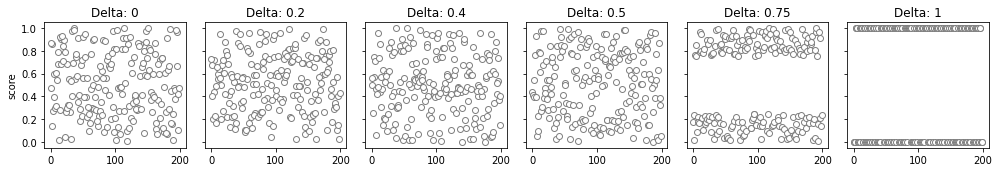

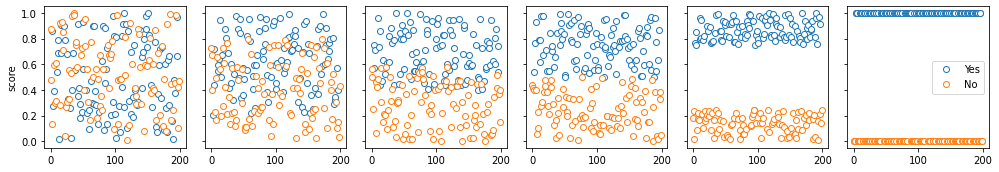

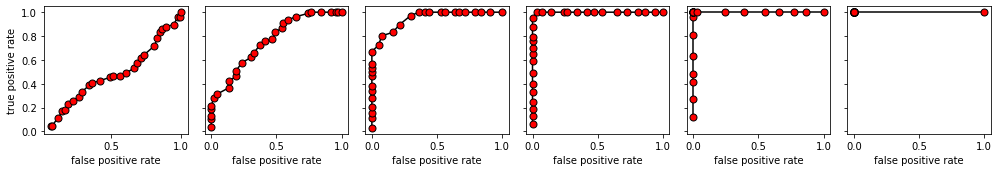

In [14]:
x = np.array(range(size))

plots_number = len(delta_values)
fig, ax = plt.subplots(1,plots_number,figsize=(14,2.5),sharey=True)
ax[0].set_ylabel('score')

for graph, delta in enumerate(delta_values):
    
    ax[graph].plot(x[ability[delta]['iT']], df_dict[delta]['score'][ability[delta]['iT']], 'o',c='gray',mfc='w')
    ax[graph].plot(x[ability[delta]['iF']], df_dict[delta]['score'][ability[delta]['iF']], 'o',c='gray',mfc='w')
    ax[graph].set_title(f'Delta: {delta}')
    
plt.tight_layout()


plots_number = len(delta_values)
fig, ax = plt.subplots(1,plots_number,figsize=(14,2.5),sharey=True)
ax[0].set_ylabel('score')

for graph, delta in enumerate(delta_values):
    
    ax[graph].plot(x[ability[delta]['iT']], df_dict[delta]['score'][ability[delta]['iT']], 'o',mfc='w')
    ax[graph].plot(x[ability[delta]['iF']], df_dict[delta]['score'][ability[delta]['iF']], 'o',mfc='w')
    

plt.legend(['Yes', 'No'])
plt.tight_layout()

plots_number = len(delta_values)
fig, ax = plt.subplots(1, plots_number, figsize=(14,2.5),sharey=True)

ax[0].set_ylabel('true positive rate')
for graph, delta in enumerate(delta_values):
    
    rate_TP = rates[delta_values[graph]]['tpr']
    rate_FP = rates[delta_values[graph]]['fpr']

    ax[graph].plot(rate_FP[1:], rate_TP[1:], 'o-', 
                                             c='k', 
                                             ms=7,
                                             mec='k', 
                                             mfc='red')
    ax[graph].set_xlabel('false positive rate')

plt.tight_layout()